In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np
from scipy.spatial.distance import pdist, squareform


with open("weighted_features.p", 'rb') as f:
    data = pickle.load(f)

In [6]:
def get_continuous_quantile(x, y, n_interval=100, q=1):
    """
    Take continuous x and y, bin the data according to the intervals of x
    and then calculate the quantiles of y within this bin
    
    Args:
        x (list): array of x values
        y (list): array of y values
        n_interval (int): number of intervals on x
        q (float): quantile value [0, 1]
    """
    ind = np.argsort(x)
    x = x[ind]
    y = y[ind]
    boundaries = np.linspace(x[0], x[-1], n_interval+1)
    
    dx = boundaries[1] - boundaries[0]
    x_center = np.linspace(x[0]+dx/2, x[-1]-dx/2, n_interval)
    y_q = []
    for x_min, x_max in zip(boundaries[:-1], boundaries[1:]):
        ind = (x>=x_min) & (x<x_max)
        ys = y[ind]
        if len(ys) > 0:
            y_q.append(np.quantile(ys, q))
        else:
            y_q.append(y_q[-1])
    y_q = np.array(y_q)
    return x_center, y_q


def visualize(key, n_interval=100, interval=5, data_file="2430_41000.xlsx"):
    """
    Visualize the data specified by key. 
    
    Args:
        key (str): key in data 
        n_interval (int): number of intervals for drawing the quantile bounds
        interval (int): subsamping of the data. Sometimes the input data is too large for visualization
            we just subsample the data
    """
    keys = list(data['band_gap'].keys())
    f = np.concatenate([data[key][i] for i in keys], axis=0)
    values = np.array([data['band_gap'][i] for i in keys])
    sort_index = np.argsort(values)
    fscale = (f-np.min(f, axis=0)) / (np.max(f, axis=0) - np.min(f, axis=0))
    d = pdist(fscale)
    v_dist = pdist(values.reshape((-1, 1)))
    ind = (d>0) & (d<1) 
    d_ = d[ind]
    v_ = v_dist[ind]
    
    d_ = d_[::interval]
    v_ = v_[::interval]
    print(v_.shape)
    #print(d_.shape, v_.shape)
    x_center, y_q = get_continuous_quantile(d_, v_, n_interval=n_interval, q=1)
    
    
    import pandas as pd
    df = pd.DataFrame({"dF": d_, "dEg": v_})
    with pd.ExcelWriter(data_file) as writer:
        df.to_excel(writer)
        
    plt.rcParams['font.size'] = 22
    plt.rcParams['font.family'] = 'Arial'
    plt.figure(figsize=(5.7, 5.0 ))
    plt.plot(d_, v_, 'o', alpha=0.01, c='#21c277')
    plt.plot(x_center, y_q, '--', c='#21c277', lw=2, alpha=0.5)
    plt.xlim([0, 1])
    plt.ylim([0, 13])
    plt.xticks(np.linspace(0, 1, 5))
    plt.yticks(np.linspace(0, 12.5, 6))
    plt.xlabel('$d_{F}$ (a.u.)')
    plt.ylabel("$\Delta E_{g}$ (eV)")
    plt.tight_layout()


(45130,)


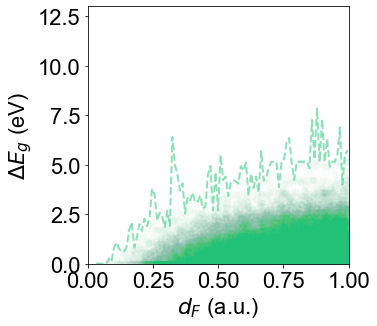

In [9]:
visualize('0_2430_41000_weighted', interval=10, data_file="2430_41000_weighted.xlsx")

(39458,)


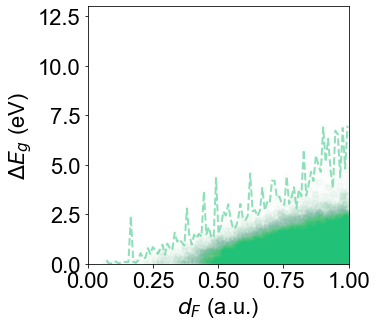

In [8]:
visualize('0_2430_41000', data_file="2430_41000.xlsx")